### Submitted by Sinéad Duffy, Id No. 10016151

### Section 1 - Introduction

This notebook will explore simple linear regression.  The dataset used to comlete the assisngment is called powerproduction.  The dataset has two elements *power* and *speed*.  The assisgnment will look to regression, specifically simple linear regression to complete the anaysis, with the aim of prediciting the relationship between power and speed.

With that mind, it is important to understand and define what regression is.  The author will also need to consider if simple linear regression is the correct model to base the analysis on, or is there another type of regrssion that would be more appropriate. The author looks at these points in the next section.

**Problem Statement** <br>
The goal of this assignment is to accurately predict wind turbine power output from wind speed values using the data contained in the powerproduction dataset.

***
### Section 2 - Regression


#### Regression - defined
Regression allows users to look at independent variables, and see how they have an impact on target values$^1,2,4$.  Amy Gallo of the Harvard Business Review$^1$ defines 4 questions that regression answers;

1. which factors matter most?
2. which factors can be ignred
3. how do the factors interact with each other?
4. are we sure the facotrs are correct?

There are two types of variables used in regression$^1,4$:

- *Dependant Variables* the main factor that is the outcome / focus of the research or prediction model
<br><br>
- *Independent Variables* which are those other variables which have an influence on the dependent variable, and can be used to predict outcomes

<br>
The relationships between the dependant and independent variables are the ones that are plotted on a graph.  Ms Gallo also reminds readers that it's important to note that 'correlation is not causation'. This is taken to mean that although variable can have clear relationships, it's not enought to assume that there is a 'cause and effect' / correlation in place. Ms Gallo cautions about making assumeptions about anything in regression analysis.

#### Regression types
Wikipedia$^4$ outlines that there is 32 models of regression.  It goes on to group the into 5 standard types outlined below.

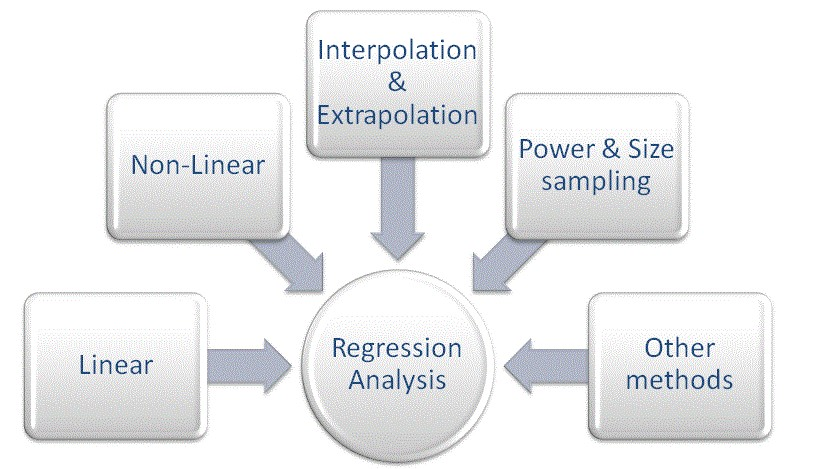

The author will focus on linear regression for the purpose of this assignment, with a brief overview of other types included also.


Regression analysis is used in business for a number of reasons including$^1,3,5$;

- estimating the relationships between variables
- finding trends within data
- used to predict values
- can help understand the importance of the variables, and how they affect each other.

The next section will explore some of the diffent types of regression
***
### Section 3 - Regression Explored

#### Simple Linear Regression
Simple Linear Regression shows the relationship between independent and dependent variables, by use of a line$^1,3,5,8$.  Independent variables are displayed on the x axis, dependent variables on the y axis$^4,5$.  If a straight line can be drawn between the variables, this is called the 'Best fit' line$^3$.

Wikipedia$^5$ outlines that linear regression focuses on conditional probability distribution, i.e. **y = ax + b**  $^5,8$, where;

**y** = dependent variable (target variable)<br>
**x** = independent variable (predictor variable)<br>
**a** & **b** = linear coefficients (estimates of unknown parameters and define the direction of the relationship - positive or negative.$^6$

The formula can be further developed by miniminising for error or the  'error term'$^2,3$.  This involes, where a point is close to the line, but not actually on it, minimising the distance for all points.
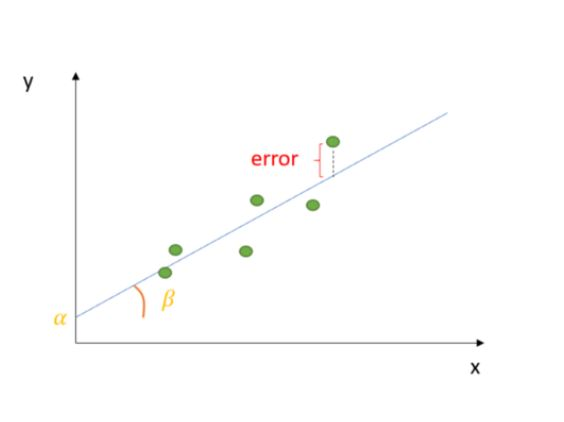
<br>
Minimising errors is completed by using the Ordinary Least Squared Method$^2,7,8$, which allows a user to drawn the line as close to all the data points as possible.
<br><br>
The formula will then be revised to be
<br><br> **y = ax + b + ei** <br><br>
Where **ei** is the allowance for Ordinary Least Squared
<br><br>
For the analysis conducted here, the power outputted, will depend on the wind speed.  Therefore, the variables can be outlined as being
<br>
**x** = Wind Speed is the independent variable (predictor variable)<br>
**y** = Power is the dependent variable (target variable)<br>



In [1]:
#Code Cell 1 - import packages from the Python Standard Library
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import seaborn as sns
import csv

In [2]:
#Code Cell 2  - import the dataframe into the notebook
df = pd.read_csv('powerproduction.csv')
print (df)

      speed  power
0     0.000    0.0
1     0.125    0.0
2     0.150    0.0
3     0.225    0.0
4     0.275    0.0
..      ...    ...
495  24.775    0.0
496  24.850    0.0
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0

[500 rows x 2 columns]


In [3]:
#Code Cell 3 - describe the dataframe 
desc = df.describe()
print(desc)

            speed       power
count  500.000000  500.000000
mean    12.590398   48.014584
std      7.224991   41.614572
min      0.000000    0.000000
25%      6.324750    5.288000
50%     12.550500   41.645500
75%     18.775250   93.537000
max     25.000000  113.556000


Text(0, 0.5, 'power')

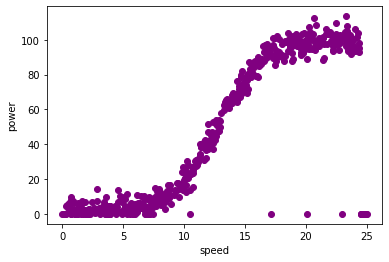

In [4]:
#Code Cell 4 - graphing the relationship between power and speed
plt.scatter(df['speed'], df['power'], color='purple')
plt.xlabel('speed')  
plt.ylabel('power')


In [5]:
#Code Cell 5 - convert from a dataframe to an array
#extract speed from the dataframe .. reshape makes sure that the array is 2d

x = np.array(df.iloc[:,0])
print(type(x))

#extract speed from the dataframe
y = np.array(df.iloc[:,1])
print(type(y))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [6]:
#Code Cell 6 - get the coefficients using polyfit.

coeffs = np.polyfit(x,y,1)
print(coeffs)

#code to limit the number of spaces after the .
#print(f'coeff:{coeff:.3f})

[  4.91759567 -13.89990263]


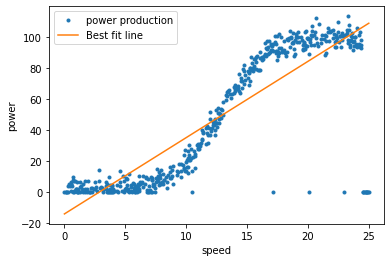

In [7]:
#Code Cell 7 - insert the best fit line with Graphs
plt.plot(x, y, '.', label="power production")
plt.plot(x, coeffs[0] * x + coeffs[1], '-', label='Best fit line')
plt.xlabel('speed')  
plt.ylabel('power')
plt.legend();

In [8]:
#Code Cell 8  2nd method of implementing a Simple Linear Regression ... Ref Pt 11
#calculations made using numpy and sklearn

#  https://realpython.com/linear-regression-in-python/

#Step 1 - import packages - Numpy and sklearn

#Step 2 - extract the data
#extract speed from the dataframe .. reshape makes sure that the array is 2d
x_lin = np.array(df.iloc[:,0]).reshape((-1,1))

#extract speed from the dataframe
y_lin = np.array(df.iloc[:,1]).reshape((-1,1))

#Step 3 - Create a linear regression model and fit it
#fit() calculates teh optimal values of b, i.e. it fits to the model
model = LinearRegression().fit(x_lin,y_lin)

#Step 4 - Get Results
#obtain the coefficient of determination (𝑅²) with .score() 
r_sq = model.score(x_lin, y_lin)
print('coefficient of determination / R sqrd:', r_sq)

new_model = LinearRegression().fit(x_lin, y_lin.reshape((-1, 1)))
print('intercept:', new_model.intercept_)
print('slope:', new_model.coef_)

#Step 5 - Predict response
y_lin_pred = model.predict(x_lin)
#print  out a 1 dimensional array of the results
#print('predicted response:', y_pred, sep='\n')


#results are the same as in method 1

coefficient of determination / R sqrd: 0.7289360258564073
intercept: [-13.89990263]
slope: [[4.91759567]]


**The Pearson Correlation Coefficient / rsquared value**

As outlined in the Introduction Section, it is not good pracitce to assume a correlation exists between variables when completing a regression anaylsis.  A way to confirm if a correlation exists is by using a correlation coefficient to measure the relationships between variables in a dataset.  $^15$
<br>
There are a number of ways of calculating a correlation including;
- Pearson Correlation Coefficient
- Spearman Correlation Coefficient
- Kendall Correlation 

The author has chosen to use the Pearson Correlation Coefficient, also know as Pearson's r,  to determine if a correlation exists.$^15$
<br><br>
Pearson's rsquared value looks at how a regression line, fits to the data it's matched against, i.e the variation in *y* can be explained by the dependance of *x*. $^10,12,16$  It is, simply put, the rsquared value shows what a perfect fit would look like.
<br>
The rsquared value will outline if a positive / negative or no relationship exists between the variables.  What the outcome of a correlaton means has been defined in the table below; $^15$

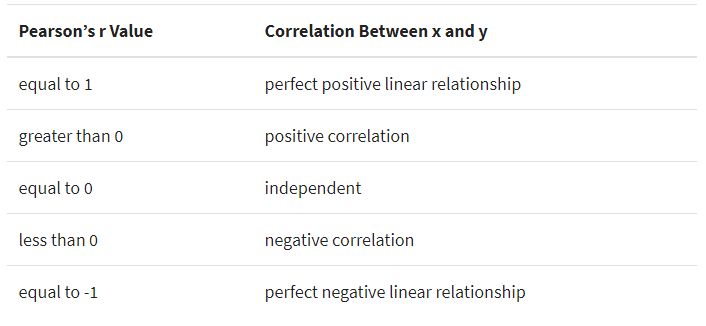

<br>
It's clear from the graph above, that a Simple Linear Regression is not the best fit for this type of data.  The 'best fit line' does intercept the line in 3 different places, but the curves clearly show allow for a sizeable ordinary least squared / error term.

In [21]:
#Code Cell 9 - confirming the rsquared value using Pearsons Correlation - Ref Pt 15
corre = np.corrcoef(x,y)
corre

array([[1.       , 0.8537775],
       [0.8537775, 1.       ]])

<AxesSubplot:>

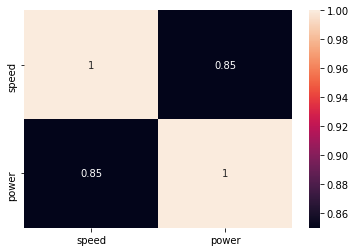

In [20]:
#Code Cell 10 - correlation heatmap to demonstrate the correlation between the two variables
#Ref pt 10
#demonstrates that a correlation exists between the two variables.
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

#### Results of the Simple Linear Regression Analysis

The results can be described as .....

### Polynomial Regression

Polynomial regression explores the nonlinear relationship between variables x and y, where a correlation exists. $^10,12,13$   In essence, this means that the best fit line should curve to some degree, to better represent the relationshp between the two variables.



In [10]:
#Code Cell 11 - extract x and y variables from the dataframe
x_poly = np.array(df.iloc[:,0])
print(type(x_poly))

#extract speed from the dataframe
y_poly = np.array(df.iloc[:,1])
print(type(y_poly))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Text(0.5, 1.0, 'Polynomial Regression')

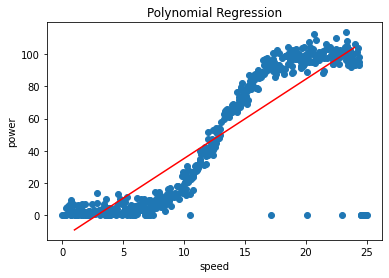

In [19]:
#Code Cell 12 - graphing the relationship between power and speed for a polynomial distribution

#enter the number of degrees to raise the polynomial by...1 / 2/3/4 etc
p = np.poly1d(np.polyfit(x_poly,y_poly,1))
xp = np.linspace(1, 24, num=500)
plt.plot(xp,p(xp),c = 'r')
plt.scatter(x_poly,y_poly)
plt.xlabel('speed')  
plt.ylabel('power')
plt.title('Polynomial Regression')

Text(0.5, 1.0, 'Polynomial Regression')

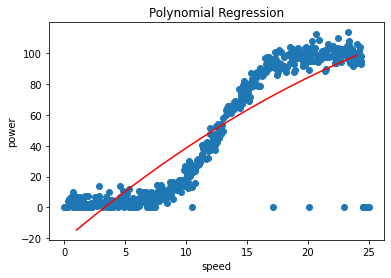

In [18]:
#Code Cell 13 - polynomial distribution, changing the number of degrees

#change degrees from 1 to 2
p = np.poly1d(np.polyfit(x_poly,y_poly,2))
xp = np.linspace(1, 24, num=500)
plt.plot(xp,p(xp),c = 'r')
plt.scatter(x_poly,y_poly)
plt.xlabel('speed')  
plt.ylabel('power')
plt.title('Polynomial Regression')

Text(0.5, 1.0, 'Polynomial Regression')

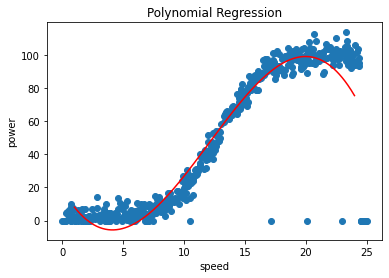

In [17]:
#Code Cell 14 - polynomial distribution, changing the number of degrees

#change degrees from 2 to 3
p = np.poly1d(np.polyfit(x_poly,y_poly,3))
xp = np.linspace(1, 24, num=500)
plt.plot(xp,p(xp),c = 'r')
plt.scatter(x_poly,y_poly)
plt.xlabel('speed')  
plt.ylabel('power')
plt.title('Polynomial Regression')

#### Results of the Analysis


### Logistic regression



https://realpython.com/logistic-regression-python/

### Section XX - Refrences

1. hbr.org, A Refresher on Regression Analysis, https://hbr.org/2015/11/a-refresher-on-regression-analysis, accessed 03 January 2021
2. towardsdatascience.com, Introduction to Machine Learning Algorithms: Linear Regression, https://towardsdatascience.com/introduction-to-machine-learning-algorithms-linear-regression-14c4e325882a, accessed 03 January 2021
3. towardsdatascience, Mathematics for Machine Learning : Linear Regression & Least Square Regression, https://towardsdatascience.com/mathematics-for-machine-learning-linear-regression-least-square-regression-de09cf53757c, accessed 03 January 2021
4. Wikipedia.com, Regression Analysis, https://en.wikipedia.org/wiki/Regression_analysis, accessed 03 January 2021
5. Javatpoint.com, Regression Analysis in Machine Learning, https://www.javatpoint.com/regression-analysis-in-machine-learning, accessed 03 January 2021
6. Statistices by Jim, Regression Coefficients, https://statisticsbyjim.com/glossary/regression-coefficient/, accessed 04 January 2021
7. Towardsdatascience.com, Understanding the OLS method for Simple Linear Regression,https://towardsdatascience.com/understanding-the-ols-method-for-simple-linear-regression-e0a4e8f692cc, accessed 04 January 2021
8. Wikipedia, Simple Linear Regression, https://en.wikipedia.org/wiki/Simple_linear_regression, 04 January 2021
9. Towarddatascience.com, Manually computing the coefficients for an OLS regression using Python, https://towardsdatascience.com/manually-computing-coefficients-for-an-ols-regression-using-python-50d8e413de, accessed 06 January 2021 
10. Towardsdatascience.com, Simple Linear Regression with Python, https://medium.com/datadriveninvestor/simple-linear-regression-with-python-1b028386e5cd, accessed 04 January 2021
11. RealPython.com, Linear Regression in Python, https://realpython.com/linear-regression-in-python/, accessed 06 January 2021
12. Towardsdatascience.com, Simple Linear vs Polynomial Regression, 
https://towardsdatascience.com/linear-vs-polynomial-regression-walk-through-83ca4f2363a3, accessed 07 January 2021
13. Wikipedia, Polynomial Regression, https://en.wikipedia.org/wiki/Polynomial_regression, acc3essed 07 January 2021
14. RealPython.com, Logistic Regression in Python, https://realpython.com/logistic-regression-python/, accessed 08 January 2020
15. RealPython.com, NumPy, SciPy, and Pandas: Correlation With Python, https://realpython.com/numpy-scipy-pandas-correlation-python/, accessed 08 January 2020
16. Wikipedia.com, Pearson Correlation Coefficient, https://en.wikipedia.org/wiki/Pearson_correlation_coefficient, accessed 08 January 2020
17. 



StatisticsByJim, How to choose between Linear and NonLinear Regression, https://statisticsbyjim.com/regression/choose-linear-nonlinear-regression/, accessed 06 January 2021
